# 1 b

inputs get very big or small softmax might have a hard time computing exp

# 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_data(filename):
    
    with open(filename) as f:
        train_data = f.readlines()
    train = []
    for line in train_data:
        train.append((line.strip().split()))
    #print(train)
    #print(np.array(train, 'float')[:,0])
    return np.array(train, 'float')[:,1:], np.array(train, 'float')[:,0]

In [919]:
#load the data in train and test arrays

X_train, y_train = load_data('iris-train.txt')
X_test, y_test = load_data('iris-test.txt')

#normalize Training data
X_train = 2*(X_train-0.5)
print(X_train.mean(axis=0))
print(X_train.max())
X_test = 2*(X_test-0.5)

[ 0.64124142 -0.10178169]
1.0


In [4]:
W = np.random.rand(X_train.shape[1],np.unique(y_train).size) # 2 x 3 matrix
#np.dot(np.array([[2,4],[2,2]]),np.array([2,1]))
W.shape

(2, 3)

In [980]:
def softmax(W, X):
    e_x = np.exp(np.clip(np.dot(W.transpose(),X.transpose()),-500,500)) #we need the transpose for dimensions to match(W columns corresponds to)
    return np.divide(e_x,e_x.sum(0)) #ex.sum(0) sums elements by column and the devide function divides by row

In [1055]:
def trainSoftmax(X_train, X_test, y_train, y_test):
    
    #creation of target vectors (target array)
    
    t_train = np.empty([y_train.size, np.unique(y_train).size])
    t_test = np.empty([y_test.size, np.unique(y_train).size]) # labels in y_train and y_test should be the same
    for k in range(t_train.shape[1]):
        t_train[:,k] = np.where(y_train==k+1*(np.unique(y_train).size < 4),1,0) # + 1 depends on the labels indexing: +1 for IRIS, 0 for CIPHAR
        t_test[:,k] = np.where(y_test==k+1*(np.unique(y_train).size < 4),1,0)
    
    total_loss_train = []
    total_loss_test = []
    mean_train_accuracy = []
    mean_test_accuracy = []
    W = np.random.rand(X_train.shape[1],np.unique(y_train).size)*0.1 # weight initialization, 2 x 3 matrix
    DW = np.zeros([X_train.shape[1],np.unique(y_train).size]) # momentum
    batch_size = 100
    l_r = 0.0001 # learning rate  ciphar:0.0001
    a = 0.001 # decay parameter   ciphar: 0.001
    m_r = 0.01  # momentum rate ciphar: 0.01
    
    for epoch in range(100):
        
        # minibatch creation
        randomizer = np.arange(y_train.size)
        np.random.shuffle(randomizer)
        #initialize loss and class accuracy
        Loss_train = 0
        train_class_accuracy = []
#        print('start')
        
        #iterate over batches
        for batch_no in range(y_train.size//batch_size):
            batch = randomizer[(batch_no*batch_size):(batch_no+1)*batch_size] # batch selection
            P_train_b = softmax(W, X_train[batch,:]) # 3 x batch_size matrix

            Loss_train = Loss_train - np.multiply(t_train[batch,:].transpose(), np.log(P_train_b)).sum()

            y_train_pred = np.argmax(P_train_b, axis = 0) + 1*(np.unique(y_train).size < 4) # pick the class that maximizes the likelihood for every datapoint (+1 because of python indexing for IRIS data)

            train_class_accuracy.append(sum(list(map(lambda x: (y_train_pred[y_train[batch]==x]==x).sum()/(y_train[batch]==x).sum(), [k for k in range(1*(np.unique(y_train).size < 4),np.unique(y_train[batch]).size+1*(np.unique(y_train).size < 4))])))/np.unique(y_train[batch]).size)
            
            #gradient calculation WITH regularization (check end of next line)
            dLoss = a*W.transpose() + np.dot((P_train_b - t_train[batch,:].transpose()), X_train[batch,:]) # leads to a 3 x 2 matrix, each row being the loss gradient for this class WITH regularization

            #update momentum rule
            DW = m_r*DW + l_r*dLoss.transpose()

            W = W - DW

            
        P_test = softmax(W, X_test) # 3 x 51 matrix

        Loss_test = -np.multiply(t_test.transpose(), np.log(P_test)).sum()

        y_test_pred = np.argmax(P_test, axis = 0) + 1*(np.unique(y_test).size < 4) # +1 for IRIS, 0 for CIPHAR-10

        test_class_accuracy = sum(list(map(lambda x: (y_test_pred[y_test==x]==x).sum()/(y_test==x).sum(), [k for k in range(1*(np.unique(y_test).size < 4),np.unique(y_test).size+1*(np.unique(y_test).size < 4))])))/np.unique(y_test).size

        total_loss_train.append(Loss_train)

        total_loss_test.append(Loss_test)

        mean_train_accuracy.append(np.mean(train_class_accuracy))

        mean_test_accuracy.append(test_class_accuracy)


    fig,ax = plt.subplots(1,2,figsize = (12,6))
    ax[0].plot(np.arange(epoch+1), total_loss_train, 'r-', np.arange(epoch+1), total_loss_test, 'b-') 
    ax[0].set(title = 'Cross-Entropy Loss', xlabel = 'Epochs', ylabel = 'Loss')#,xlim = ax[0].get_xlim(), ylim = ax[0].get_xlim())
    ax[1].plot(np.arange(epoch+1), mean_train_accuracy, 'r-', np.arange(epoch+1), mean_test_accuracy, 'b-')
    ax[1].tick_params(reset = True)
    ax[1].set(title = 'mean per-class accuracy', xlabel = 'Epochs')

    return W

terrible results for l_r = 0.1, loss bounces back and forth

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in long_scalars


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 2 2 3 2 2 2 3 3 2 2 2 2 2 2 3 2
 3 3 3 3 2 3 3 3 3 3 3 3 3 2]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.]


0.86274509803921573

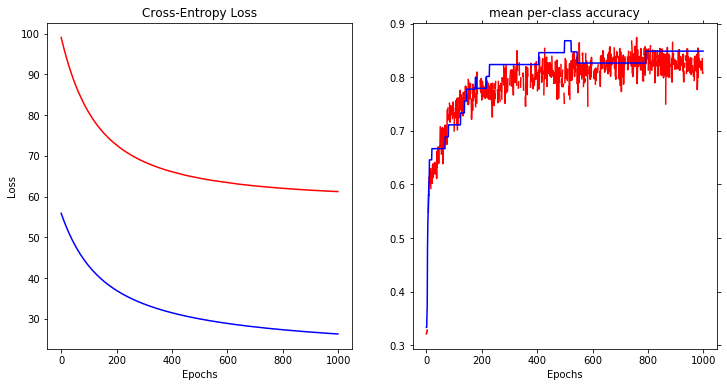

In [1043]:
#randomizer = np.arange(90)
#np.random.shuffle(randomizer)
#print(X_train[randomizer,:].shape, y_train[randomizer].shape)
W_iris = trainSoftmax(X_train, X_test, y_train, y_test)
#print(W_iris)

P = softmax(W_iris, X_test)
y_pred = np.argmax(P, axis = 0) + 1 # pick the class that maximizes the likelihood for every datapoint (+1 because of python indexing)
print(y_pred, y_test, sep='\n')
accuracy = (y_test==y_pred).sum()/y_test.size
accuracy

In [1044]:
plt.savefig('iris softmax.png')

## 2 b

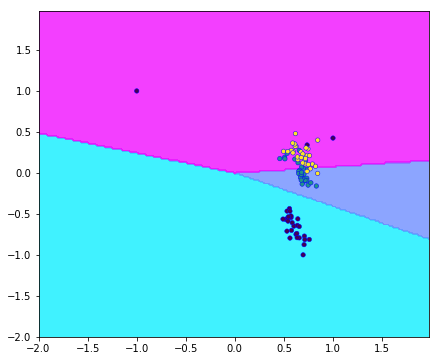

In [1045]:
# DISPLAYING THE DECISION BOUNDARIES

h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


# # Plot the decision boundary. For that, we will assign a color to each
P_train = softmax(W_iris, np.c_[xx.ravel(), yy.ravel()])
Z = np.argmax(P_train, axis = 0) + 1 

# # Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(7,6))
plt.contourf(xx, yy, Z, cmap='cool', alpha = 0.8)
plt.scatter(X_train[:,0],X_train[:,1],s=20, c = y_train, edgecolors='b', linewidths=0.5)
plt.savefig('decision_bound.png')

In [229]:
#[ 1.,  1.,  2.,  2.,  2.,  3.,  1.,  2.,  1.,  3.]
y_pred = np.array([3, 3, 1, 1, 1, 1, 3, 1, 3, 1])
y_train[[25, 22, 45, 54, 51, 72, 28, 47, 27, 80]]
#(y_pred[y_train[[ 4,  2, 53,  8,  7, 52, 88, 47, 17, 19]] == 1]==1).sum()/(y_train[[ 4,  2, 53,  8,  7, 52, 88, 47, 17, 19]] == 1).sum()#== np.array( [3, 3, 2, 2, 3, 2, 2, 3, 3, 2])

array([ 1.,  1.,  2.,  2.,  2.,  3.,  1.,  2.,  1.,  3.])

# 3

In [1051]:
def loadCIFAR10():
    import pickle
    train_dict = {}
    for file_no in range(1,6):
        with open('cifar-10-batches-py/data_batch_{}'.format(file_no), 'rb') as fo:
            train_dict[file_no] = pickle.load(fo, encoding='bytes')
    with open('cifar-10-batches-py/test_batch', 'rb') as fo:
        test_dict = pickle.load(fo, encoding='bytes')
    
    #aggregating the train batches
    data = train_dict[1][b'data'] # features are already in numpy arrays
    labels = train_dict[1][b'labels'] # labels are in lists
    for batch in range(2,6):
        data = np.concatenate((data, train_dict[batch][b'data']))
        labels.extend(train_dict[batch][b'labels']) #labels are in lists
    
    return (data, np.array(labels), test_dict[b'data'], np.array(test_dict[b'labels']))

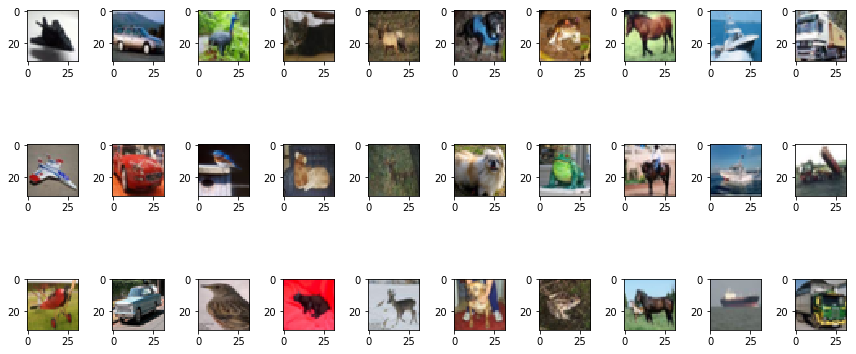

In [1052]:
train_feat, train_labels, test_feat, test_labels = loadCIFAR10()

#display first images
rows = 3
cols = 10
fig, axes = plt.subplots(rows, cols, figsize=(12,6))

for i in range(rows*cols):
    row_index = i//cols
    col_index = i%cols
    ax = axes[row_index, col_index]
    ax.imshow(train_feat[train_labels==col_index,:][row_index,:].reshape(3,32,32).transpose(1,2,0))
    
plt.tight_layout()
plt.savefig('ciphar_images.png')

# 4

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in long_scalars


[3 9 8 ..., 3 5 7]
[3 8 8 ..., 5 1 7]


0.41239999999999999

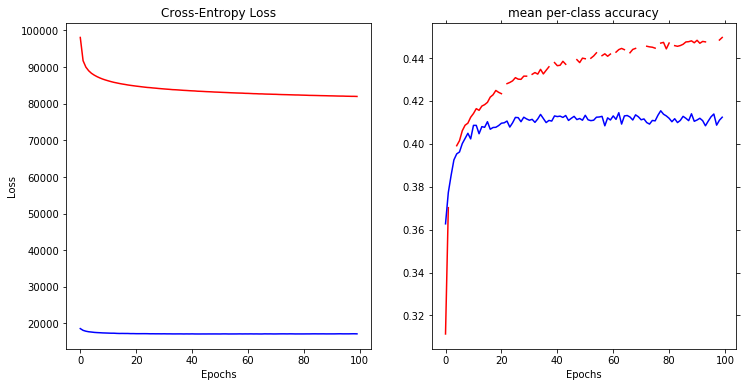

In [1056]:
train_feat = np.divide(train_feat - train_feat.min(axis=0),train_feat.max(axis=0) - train_feat.min(axis=0))
train_feat = train_feat - train_feat.mean(axis=0)
test_feat = np.divide(test_feat - test_feat.min(axis=0),test_feat.max(axis=0) - test_feat.min(axis=0))
test_feat = test_feat - test_feat.mean(axis=0)
#print(train_feat[0,1:10], test_feat[0,1:10])
W_ciphar = trainSoftmax(train_feat, test_feat, train_labels, test_labels)


P = softmax(W_ciphar, test_feat)
y_pred = np.argmax(P, axis = 0) # pick the class that maximizes the likelihood for every datapoint (no +1, classes start from 0)
print(y_pred, test_labels, sep='\n')
accuracy = (test_labels==y_pred).sum()/test_labels.size
accuracy

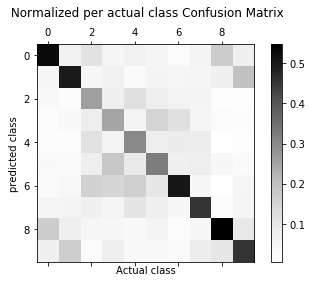

In [1060]:
# create the confusion matrix
CM = []
for label in range(np.unique(test_labels).size):
    CM.append([(test_labels[y_pred == label]==k).sum() for k in range(np.unique(test_labels).size)]) # no + 1 for CIPHAR-10
CM = np.array(CM)
# normalize it based on actual class, i.e.
# x% of class 1 objects are classified as class 2
CM = CM/CM.sum(axis=0)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(CM, cmap = 'Greys')
fig.colorbar(cax)
# plt.figure(figsize=(3,3))
# cax = ax.matshow(CM, cmap = 'Greys')
# plt.colorbar(cax)
ax.set_title(' Normalized per actual class Confusion Matrix', y = 1.1)
ax.set_xlabel('Actual class'); ax.set_ylabel('predicted class')
plt.show()
plt.savefig('confusion_heatmap.png')

# 5

## Part 1

In [440]:
def loadMusicData(fname, addBias):
    data = []
    with open(fname) as f:
        for line in f.readlines():
            data.append((line.strip().split(',')))
            if addBias == True:
                data[-1].extend('1')
    #print(np.array(train, 'float')[:,0])
    data = np.array(data, 'float')
    
    return data[:463714,0].astype(int), data[:463714,1:], data[463714:,0].astype(int), data[463714:,1:]

In [441]:
def musicMSE(pred, gt):
    s_e = (gt - np.around(pred))**2
    
    return np.mean(s_e)

In [723]:
trainYears, trainFeat, testYears, testFeat = loadMusicData('YearPredictionMSD/YearPredictionMSD.txt', addBias = True)

In [458]:
testFeat.max(axis = 0)-testFeat.min(axis = 0)

array([    53.57957,    578.21752,    508.41354,    424.98952,
          278.76227,    224.2175 ,    196.71867,    184.61326,
          160.14977,     74.44344,    150.43026,    156.52906,
          399.09498,  43964.5142 ,  20071.5186 ,  23038.85808,
         9984.88467,   9785.22913,  11869.67859,   5457.0007 ,
         5795.42359,   2663.51925,   4099.18134,   5137.56699,
         2937.56448,  28545.82759,  18736.1986 ,   5712.02612,
         3457.92752,   3172.70585,   3744.72652,   1961.95392,
         2929.97445,   2195.16116,   1332.97519,   2251.27322,
        12670.7257 ,  11638.8786 ,  10481.28897,   7324.86656,
         4235.42544,   4946.59823,   2562.25262,   1450.76445,
         1119.99322,   2144.46292,  15881.64809,   9720.07065,
        10241.95982,   3834.66003,   2425.49941,   2156.43014,
         3003.63609,   2740.79937,   1518.33256,   9875.71117,
        16095.41919,   9173.32411,   8461.30083,   3854.64363,
         2501.73231,   2115.42422,   1147.37013,  15160

range (max - min) of values is small for the first 12 features but it gets significantly larger for the following 78 features. This is expected of course since the former represent the average timbre whereas the latter represent timber covariance, i.e. the order is closer to that of timbre squared.

In [462]:
print('Training years range from {} to {}'.format(trainYears.min(), trainYears.max()))
print('Testing years range from {} to {}'.format(testYears.min(), testYears.max()))

Training years range from 1922 to 2011
Testing years range from 1927 to 2010


[ 1921.  1930.  1939.  1948.  1957.  1966.  1975.  1984.  1993.  2002.
  2011.]


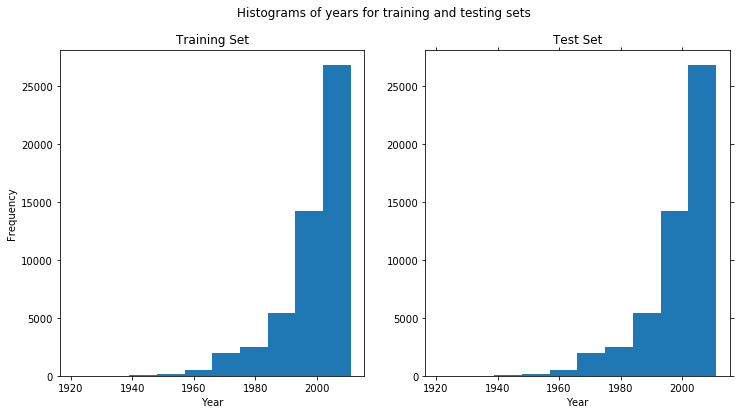

In [489]:
fig,ax = plt.subplots(1,2,figsize = (12,6))#, sharey = True, sharex = True)
fig.suptitle('Histograms of years for training and testing sets')
x,bins,p= ax[0].hist(testYears, range = (1921,2011 )) # with normed = True normalizes so that the area under the hist is 1
print(bins)
ax[0].set(title = 'Training Set', xlabel = 'Year', ylabel = 'Frequency')#,xlim = ax[0].get_xlim(), ylim = ax[0].get_xlim())
ax[1].hist(testYears, range = (1921, 2011))
ax[1].tick_params(reset = True)
ax[1].set(title = 'Test Set', xlabel = 'Year')
#savefig("figureC.png", bbox_inches='tight')
#plt.hist(trainYears)

We see that train and test labels follow a similar distribution which is good for our prediction purposes. However, both sets are dominated by songs from the last 2 decades that account for more than 90% of the sets' observations. Especially as we go back in time we get fewer and fewer instances, which results to years before the 70's being seriously underepresented.

In [508]:
years, counts = np.unique(trainYears, return_counts=True)
year = years[np.argmax(counts)] # year = 2007
mse_2007 = musicMSE(year, testYears)
print(mse_2007)
mse_1998 = musicMSE(1998, testYears)
print(mse_1998)

190.082392361
118.009006217


## Part 2

In [651]:
def RidgeRegression(X_train, X_test, y_train, y_test, regularization):
    
    L2 = False
    if regularization == 'L2':
        L2 = True
    
    W = np.random.rand(X_train.shape[1]) # weight initialization, 91-vector
    
    batch_size = 100
    l_r = 0.00001 # learning rate
    a2 = 0.01 # L2 decay parameter
    a1 = 0.01 # L1 decay parameter
    
    #initial values of losses and MSEs
    y_test_pred = np.dot(X_test,W)
    y_train_pred = np.dot(X_train,W)
    total_loss_train = [((y_train_pred-y_train)**2).sum() + L2*a2*((W**2).sum()) + (1-L2)*a1*np.linalg.norm(W, ord=1)]
    total_loss_test = [((y_test_pred-y_test)**2).sum() + L2*a2*((W**2).sum()) + (1-L2)*a1*np.linalg.norm(W, ord=1)]
    train_MSE = [musicMSE(y_train_pred, y_train)]
    test_MSE = [musicMSE(y_test_pred, y_test)]
    
    for epoch in range(20):
        
        # minibatch creation
        randomizer = np.arange(y_train.size)
        np.random.shuffle(randomizer)
        #initialize loss and class accuracy
        Loss_train = 0
        batch_MSE = []
        print('start', Loss_train)
        
        #iterate over batches
        for batch_no in range(y_train.size//batch_size):
            batch = randomizer[(batch_no*batch_size):(batch_no+1)*batch_size] # batch selection
            y_train_pred = np.dot(X_train[batch,:],W) # y_pred = W.t*X, batch size vector, will be used in all computations below
            # train square loss
            train_s_l = ((y_train_pred-y_train[batch])**2).sum() # sum of (y_pred-y)^2
            
            # regularized train loss
            Loss_train = Loss_train + train_s_l + L2*a2*((W**2).sum()) + (1-L2)*a1*np.linalg.norm(W, ord=1) # L2 regularization term in the end

            #gradient calculation WITH regularization (check end of next line)
            dLoss = L2*2*a2*W + (1-L2)*a1*np.sign(W) + np.dot(X_train[batch,:].transpose(),(y_train_pred-y_train[batch])) # 91-vector gradient of loss
            
            batch_MSE.append(train_s_l) #just the sum of squared errors here, average will be per epoch

            # update rule for weights
            W = W - l_r*dLoss

        y_test_pred = np.dot(X_test,W)
        Loss_test = ((y_test_pred-y_test)**2).sum() + L2*a2*((W**2).sum()) + (1-L2)*a1*np.linalg.norm(W, ord=1)     
        total_loss_train.append(Loss_train)
        total_loss_test.append(Loss_test)
        train_MSE.append(np.sum(batch_MSE)/y_train.size)
        test_MSE.append(musicMSE(y_test_pred, y_test)) # used the mse function from earlier for a change

    fig,ax = plt.subplots(1,2,figsize = (12,6))#, sharey = True, sharex = True)
    fig.suptitle('Train and Test Mean Square Errors')
    ax[0].plot(np.arange(epoch+2), train_MSE, 'r-') # with normed = True normalizes so that the area under the hist is 1
    ax[0].set(title = 'Training MSE', xlabel = 'Epochs', ylabel = 'MSE')#,xlim = ax[0].get_xlim(), ylim = ax[0].get_xlim())
    ax[1].plot(np.arange(epoch+2), test_MSE, 'b-')
    ax[1].tick_params(reset = True)
    ax[1].set(title = 'Test MSE', xlabel = 'Epochs')
    
    fig,ax = plt.subplots(1,2,figsize = (12,6))#, sharey = True, sharex = True)
    fig.suptitle('Train and Test Loss')
    ax[0].plot(np.arange(epoch+2), total_loss_train, 'r-') # with normed = True normalizes so that the area under the hist is 1
    ax[0].set(title = 'Training Loss', xlabel = 'Epochs', ylabel = 'Loss')#,xlim = ax[0].get_xlim(), ylim = ax[0].get_xlim())
    ax[1].plot(np.arange(epoch+2), total_loss_test, 'b-')
    ax[1].tick_params(reset = True)
    ax[1].set(title = 'Test Loss', xlabel = 'Epochs')
    
    plt.show()

    return W, test_MSE[-1]

start 0
start 0
start 0
start 0
start 0
start 0
start 0
start 0
start 0
start 0
start 0
start 0
start 0
start 0
start 0
start 0
start 0
start 0
start 0
start 0
test MSE  [3992476.863589704, 485.81234142278862, 92.095020433460519, 91.17452693149464, 90.982839766806762, 91.022370281420081, 90.920706552265116, 90.913598419554148, 90.831903313900568, 91.026476341732675, 90.784334992543236, 90.868799752086929, 90.874048536731806, 90.753423330944585, 90.914256938660884, 90.824349712382102, 90.880594991381145, 90.883325908853209, 90.779008735062263, 90.887935542600374, 90.847223567236739]
train loss 227532099.491
test loss [206135780144.9462, 25111308.445369527, 4789949.0680908449, 4743724.0652938867, 4733767.1938971952, 4736385.6495331842, 4731823.3778216476, 4731019.088409639, 4726424.6074955203, 4734443.4492373904, 4724555.692748622, 4728108.1776860701, 4727067.2480719518, 4720467.4644232513, 4728516.3086533956, 4725574.2668381911, 4728442.6646074085, 4727478.1550486917, 4724317.7589438055

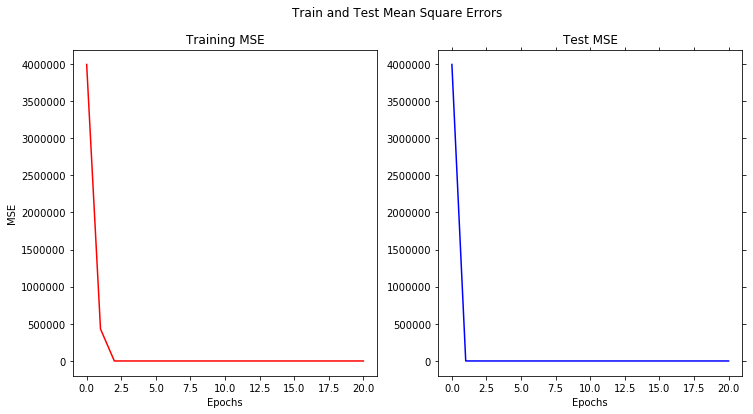

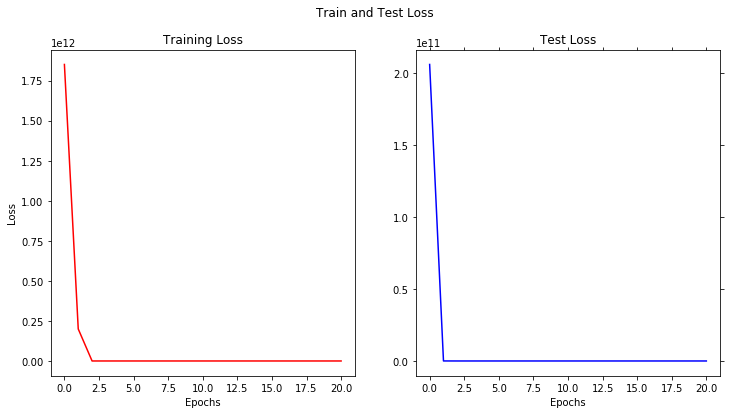

90.8472235672


In [667]:
trainFeat_normed = trainFeat
trainFeat_normed[:,:-1] = np.divide((trainFeat[:,:-1] - trainFeat[:,:-1].mean(axis=0)),trainFeat[:,:-1].std(axis=0, ddof=1))
testFeat_normed = testFeat
testFeat_normed[:,:-1] = (testFeat[:,:-1] - trainFeat[:,:-1].mean(axis=0))/trainFeat[:,:-1].std(axis=0, ddof=1)

W_Ridge, MSE_Ridge = RidgeRegression(trainFeat_normed, testFeat_normed, trainYears, testYears, regularization = 'L2')
print(MSE_Ridge)

we start with MSE and Loss before the first epoch to show how fast it drops in the first epoch. this happens because our dataset is big and many batch iterations occur during an epoch.
OR
We start with MSE and Loss after the first epoch has run because the value of lost and MSE before any training dominates the graph as it is too high and the curve is not clear after.

In [612]:
# RIDGE solution with pseudoinverse --> W = (XtX+λI)^-1*Xt y
argument = np.dot(trainFeat_normed.transpose(),trainFeat_normed) + a*np.identity(trainFeat_normed.shape[1])
W_pseudo = np.dot(np.linalg.inv(argument), np.dot(trainFeat_normed.transpose(), trainYears))
pseudo_MSE = musicMSE(np.dot(testFeat_normed,W_pseudo), testYears)
print(pseudo_MSE)

90.5558288625


# Part 3

start 0
start 0
start 0
start 0
start 0
start 0
start 0
start 0
start 0
start 0
start 0
start 0
start 0
start 0
start 0
start 0
start 0
start 0
start 0
start 0
test MSE  [3991866.9899478997, 468.79535550347657, 91.274156998702324, 90.733086711471785, 90.807189479188864, 90.61908543317, 90.571420270767561, 90.630532044701823, 90.734093858340913, 90.577385679146246, 90.670682342003829, 90.5394239894637, 90.634270109043015, 90.584900544246679, 90.563382464023547, 90.561833007301814, 90.550231450097812, 90.520985454475024, 90.607658189847186, 90.592047413375681, 90.642036760860719]
train loss 42441164.9569
test loss [206103931208.58847, 24201341.773651514, 4706784.6051369505, 4680382.8416273873, 4683877.2398573291, 4675453.5705732033, 4669972.4697778346, 4674969.332607762, 4678286.6775677372, 4671930.9666122207, 4675881.962076176, 4672890.6392984353, 4674745.0792978331, 4673086.9857429322, 4671515.5401844541, 4672634.4220253276, 4670340.9168868233, 4671383.8947491525, 4671777.9471480092, 4

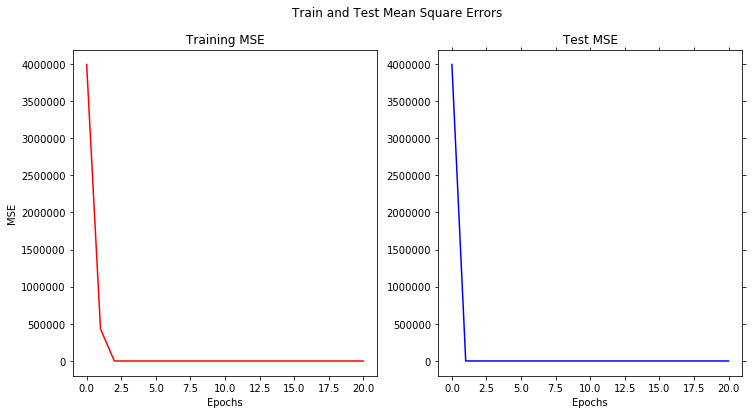

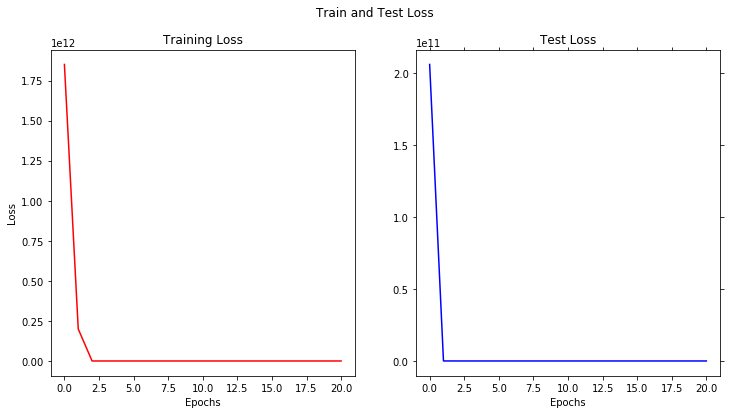

90.6420367609


In [668]:
W_Lasso, MSE_Lasso = RidgeRegression(trainFeat_normed, testFeat_normed, trainYears, testYears, regularization = 'L1')
print(MSE_Lasso)

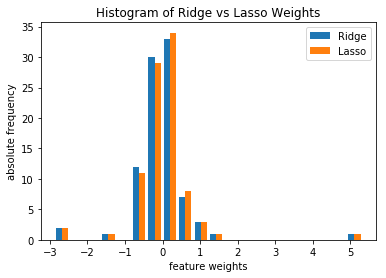

In [675]:
#print(np.sort(np.unique(W_Ridge[:-1])), np.sort(np.unique(W_Lasso)))
plt.hist((W_Ridge[:-1], W_Lasso[:-1]), bins = 20)
plt.title('Histogram of Ridge vs Lasso Weights')
plt.ylabel('absolute frequency')
plt.xlabel('feature weights')
plt.legend(('Ridge','Lasso'))

# Part 4

In [890]:
def exp_decay(l_r, epoch):
    drop = 0.5 # decaying parameter
    lr_new = l_r*drop**(epoch//2)
    return lr_new

In [909]:
def PoissonRegression(X_train, X_test, y_train, y_test):
    
    # standardize train and test years based on train set to use them in our algorithm, otherwise they take large values and blow up computations
    train_st_dev = np.std(y_train, ddof=1)
    train_mean = np.mean(y_train)
    print(train_st_dev, train_mean)
    y_train = (y_train - train_mean)/train_st_dev
    y_test = (y_test - train_mean)/train_st_dev
    
    # initialize to random small weights
    W = np.random.rand(X_train.shape[1])*0.001 # weight initialization, 91-vector
    
    batch_size = 100
    l_r = 0.000001 # learning rate
    
    #initial values of losses and MSEs
    y_train_pred = np.exp(np.dot(X_train,W))
    y_test_pred = np.exp(np.dot(X_test,W))
    total_loss_train = [(y_train_pred - np.multiply(np.dot(X_train,W),y_train)).sum()]
    total_loss_test = [(y_test_pred - np.multiply(np.dot(X_test,W),y_test)).sum()]
    train_MSE = [musicMSE(y_train_pred, y_train)*train_st_dev**2]
    test_MSE = [musicMSE(y_test_pred, y_test)*train_st_dev**2]
    
    for epoch in range(10):
        
        # minibatch creation
        randomizer = np.arange(y_train.size)
        np.random.shuffle(randomizer)
        #initialize loss and class accuracy
        Loss_train = 0
        batch_MSE = []
        l_r = exp_decay(l_r, epoch)
        print('start')
        
        #iterate over batches
        for batch_no in range(y_train.size//batch_size):
            batch = randomizer[(batch_no*batch_size):(batch_no+1)*batch_size] # batch selection
            WtX = np.dot(X_train[batch,:],W) # W.t*X, batch size vector, will be used in all computations below

            y_train_pred = np.exp(np.clip(WtX,-100,100))  # y_pred = exp(W.t*X), for Poisson y_pred is the mean value of P(Y|X)
           
            # train loss
            Loss_train = Loss_train + (y_train_pred - np.multiply(WtX,y_train[batch])).sum()

            #gradient calculation

            dLoss = np.dot(X_train[batch,:].transpose(),(y_train_pred - y_train[batch])) # 91-vector gradient of loss = sum((exp(WtX)-y)X)
            
            batch_MSE.append(((y_train_pred-y_train[batch])**2).sum()) #just the sum of squared errors here, average will be per epoch

            # update rule for weights
            W = W - l_r*dLoss
        
        test_WtX = np.dot(X_test,W)  #will be used couple of times below
        y_test_pred = np.exp(np.clip(test_WtX,-100,100))
        Loss_test = (y_test_pred - np.multiply(test_WtX,y_test)).sum()
        total_loss_train.append(Loss_train)
        total_loss_test.append(Loss_test)
        train_MSE.append((np.sum(batch_MSE)/y_train.size)*train_st_dev**2) #de-standardizing final MSE output
        test_MSE.append(musicMSE(y_test_pred, y_test)*train_st_dev**2) # used the mse function from earlier for a change
        

    fig,ax = plt.subplots(1,2,figsize = (12,6))#, sharey = True, sharex = True)
    fig.suptitle('Train and Test Mean Square Errors')
    ax[0].plot(np.arange(epoch+2), train_MSE, 'r-') # with normed = True normalizes so that the area under the hist is 1
    ax[0].set(title = 'Training MSE', xlabel = 'Epochs', ylabel = 'MSE')#,xlim = ax[0].get_xlim(), ylim = ax[0].get_xlim())
    ax[1].plot(np.arange(epoch+2), test_MSE, 'b-')
    ax[1].tick_params(reset = True)
    ax[1].set(title = 'Test MSE', xlabel = 'Epochs')
    
    fig,ax = plt.subplots(1,2,figsize = (12,6))#, sharey = True, sharex = True)
    fig.suptitle('Train and Test Loss')
    ax[0].plot(np.arange(epoch+2), total_loss_train, 'r-') # with normed = True normalizes so that the area under the hist is 1
    ax[0].set(title = 'Training Loss', xlabel = 'Epochs', ylabel = 'Loss')#,xlim = ax[0].get_xlim(), ylim = ax[0].get_xlim())
    ax[1].plot(np.arange(epoch+2), total_loss_test, 'b-')
    ax[1].tick_params(reset = True)
    ax[1].set(title = 'Test Loss', xlabel = 'Epochs')
    
    plt.show()

    return W, test_MSE    

10.939771429 1998.38607633
start
start
start
start
start
start
start
start
start
start


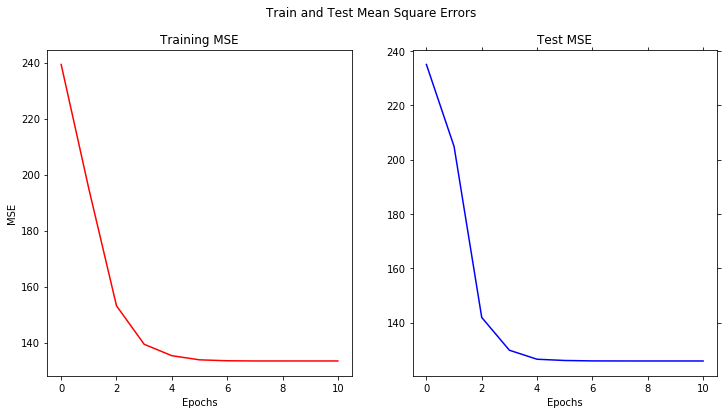

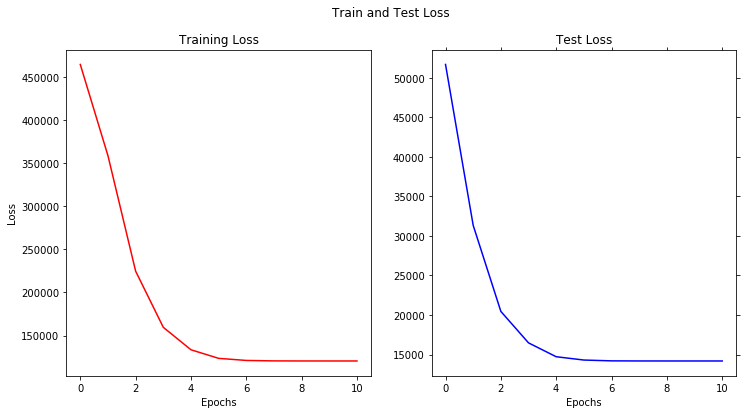

[235.0503370952955, 204.86487661165066, 141.8725152688489, 129.79650247597132, 126.48289423459491, 126.02658499455848, 125.86889143976909, 125.84874071820796, 125.84523200323464, 125.84523200323464, 125.84523200323464]


In [910]:
# print(trainYears_centered.min())
# trainYears_normed = (trainYears - np.mean(trainYears))/np.std(trainYears, ddof=1)
# testYears_normed = (testYears - np.mean(testYears))/np.std(testYears, ddof = 1)
W_Poisson, MSE_Poisson = PoissonRegression(trainFeat_normed, testFeat_normed, trainYears, testYears)
print(MSE_Poisson)

In [1063]:
def SongSoftmax(X_train, X_test, y_train, y_test):
    
    #creation of target vectors (target array)
    
    t_train = np.empty([y_train.size, np.unique(y_train).size])
    t_test = np.empty([y_test.size, np.unique(y_train).size]) # labels in y_train and y_test should be the same
    for k in range(t_train.shape[1]):  #years from 1922 to 2011, only 1923 is missing from train set
        t_train[:,k] = np.where(y_train==k+1922,1,0) # + 1 depends on the labels indexing: +1 for IRIS, 0 for CIPHAR
        t_test[:,k] = np.where(y_test==k+1922,1,0)
    
    
#    print(X_train[randomizer,:].shape, y_train[randomizer].shape)
    
    
    total_loss_train = []
    total_loss_test = []
    mean_train_accuracy = []
    mean_test_accuracy = []
    W = np.random.rand(X_train.shape[1],np.unique(y_train).size) # weight initialization, 2 x 3 matrix
    DW = np.zeros([X_train.shape[1],np.unique(y_train).size]) # momentum
    batch_size = 100
    l_r = 0.00001 # learning rate
    a = 0.001 # decay parameter
    m_r = 0.01  # momentum rate
    
    for epoch in range(50):
        
        # minibatch creation
        randomizer = np.arange(y_train.size)
        np.random.shuffle(randomizer)
        #initialize loss and class accuracy
        Loss_train = 0
        train_class_accuracy = []
        print('start')
        
        #iterate over batches
        for batch_no in range(y_train.size//batch_size):
            batch = randomizer[(batch_no*batch_size):(batch_no+1)*batch_size] # batch selection
#            print('batch =', batch)
            P_train_b = softmax(W, X_train[batch,:]) # 3 x batch_size matrix
#            print('softmax = ', P_train_b)
            Loss_train = Loss_train - np.multiply(t_train[batch,:].transpose(), np.log(P_train_b)).sum()
#            print('Loss_train = ', Loss_train)
            y_train_pred = np.argmax(P_train_b, axis = 0) + 1922 # pick the class that maximizes the likelihood for every datapoint (+1 because of python indexing for IRIS data)
#            print('Y predictions: ', y_train_pred)
#            print('accuracy = ',sum(list(map(lambda x: (y_train_pred[y_train[batch]==x]==x).sum()/(y_train[batch]==x).sum(), [k for k in range(1,np.unique(y_train[batch]).size+1)])))/np.unique(y_train[batch]).size)
            train_class_accuracy.append(sum(list(map(lambda x: (y_train_pred[y_train[batch]==x]==x).sum()/(y_train[batch]==x).sum(), [k for k in range(1922,np.unique(y_train[batch]).size+1922)])))/np.unique(y_train[batch]).size)
            
            #gradient calculation WITH regularization (check end of next line)
            dLoss = a*W.transpose() + np.dot((P_train_b - t_train[batch,:].transpose()), X_train[batch,:]) # leads to a 3 x 2 matrix, each row being the loss gradient for this class WITH regularization
#            print('dLoss is ', dLoss)
            #update momentum rule
            DW = m_r*DW + l_r*dLoss.transpose()
#            print('DW is ', DW)
            W = W - DW
#            print('batch over')
            
        P_test = softmax(W, X_test) # 3 x 51 matrix
#        print('test softmax:', P_test)
        Loss_test = -np.multiply(t_test.transpose(), np.log(P_test)).sum()
#        print('test Loss = ',Loss_test)
        y_test_pred = np.argmax(P_test, axis = 0) + 1922 # +1 for IRIS, 0 for CIPHAR-10
#        print('test predictions =', y_test_pred)
        test_class_accuracy = sum(list(map(lambda x: (y_test_pred[y_test==x]==x).sum()/(y_test==x).sum(), [k for k in range(1922,np.unique(y_test).size+1*922)])))/np.unique(y_test).size
        #test_class_accuracy2 = (1/np.unique(y_test).size)*((y_test_pred[y_test==1]==1).sum()/(y_test==1).sum() + (y_test_pred[y_test==2]==2).sum()/(y_test==2).sum() + (y_test_pred[y_test==3]==3).sum()/(y_test==3).sum())
#        print('test class accuracy = ', list(map(lambda x: (y_test_pred[y_test==x]==x).sum()/(y_test==x).sum(), [k for k in range(1*(np.unique(y_test).size < 4),np.unique(y_test).size+1*(np.unique(y_test).size < 4))])))
#        print('test class accuracy = ', test_class_accuracy)
        total_loss_train.append(Loss_train)
#        print('total loss train ', total_loss_train)
        total_loss_test.append(Loss_test)
#        print('total loss test ', total_loss_test)
        mean_train_accuracy.append(np.mean(train_class_accuracy))
#        print('mean_train_accuracy ', mean_train_accuracy)
        mean_test_accuracy.append(test_class_accuracy)
#        print('mean_test_accuracy ', mean_test_accuracy)
        
#    print(total_loss_train)    
    plt.plot(np.arange(epoch+1), total_loss_train, 'r-', np.arange(epoch+1), total_loss_test, 'b-')
    plt.figure()
    plt.plot(np.arange(epoch+1), mean_train_accuracy, 'r-', np.arange(epoch+1), mean_test_accuracy, 'b-')
    plt.show()
    

    return W

start


C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in long_scalars


start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start


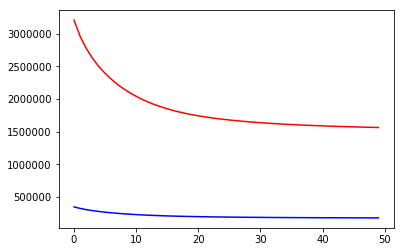

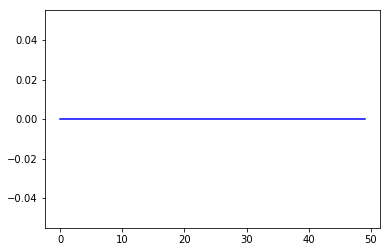

[[ 0.35162037  0.38157451  0.67143252 ...,  1.47272142  1.53710493
   1.03836432]
 [ 0.68009101  0.52540539  0.60128921 ..., -0.0203256  -0.08031497
   0.12211254]
 [ 0.17854926  0.73937696  0.72733527 ...,  0.28192291  0.45214975
   0.61852583]
 ..., 
 [ 0.31221873  0.6718052   0.49503513 ...,  0.45018071  0.46041268
   0.48034377]
 [ 0.43099609  0.37500219  0.41061947 ...,  0.46536281  0.49292418
   0.48306704]
 [-0.30946064 -0.63349962 -0.30230036 ...,  3.50321905  3.33506713
   1.64292376]]
[2005 2008 2007 ..., 1986 2003 2007]
[2007 2007 2003 ..., 2006 2006 2005]


0.078073250566520119

In [1064]:
W_songs = SongSoftmax(trainFeat_normed, testFeat_normed, trainYears, testYears)
print(W_songs)

P = softmax(W_songs, testFeat_normed)
y_pred = np.argmax(P, axis = 0) + 1922 # pick the class that maximizes the likelihood for every datapoint (+1 because of python indexing)
print(y_pred, testYears, sep='\n')
accuracy = (testYears==y_pred).sum()/testYears.size
accuracy